In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [10]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.

def visualize_classifier(model, X, y, ax=None, cmap='bwr'):
    plt.figure(figsize=(10,10))
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha = 0.5)
    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
#     ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    

**1. ¿Qué ocurre si modificas el valor de `cluster_std` en la función `make_blobs`?¿En qué casos será más fácil - o difícil - la tarea de clasificación?**

In [24]:
# Probabos cambiando cluster_std (menor desviación), lo que a priori deberia ser mas simple, porque aleja los grupos
X, y = make_blobs(
    n_samples=1000, 
    centers=2,
    random_state=0, 
    cluster_std=0.2)

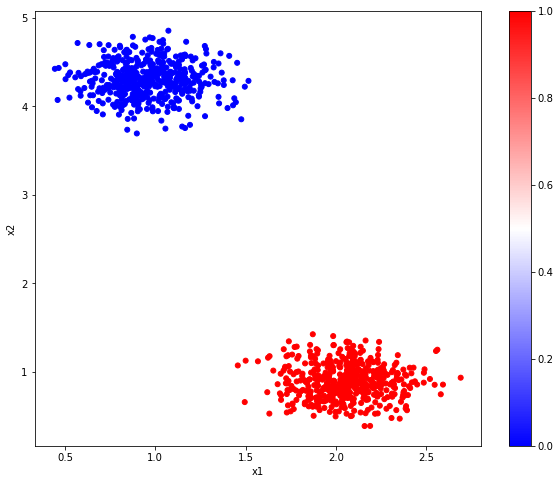

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [26]:
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)
# lo entrenamos
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

C:\Anaconda3\envs\acamica\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'clim'


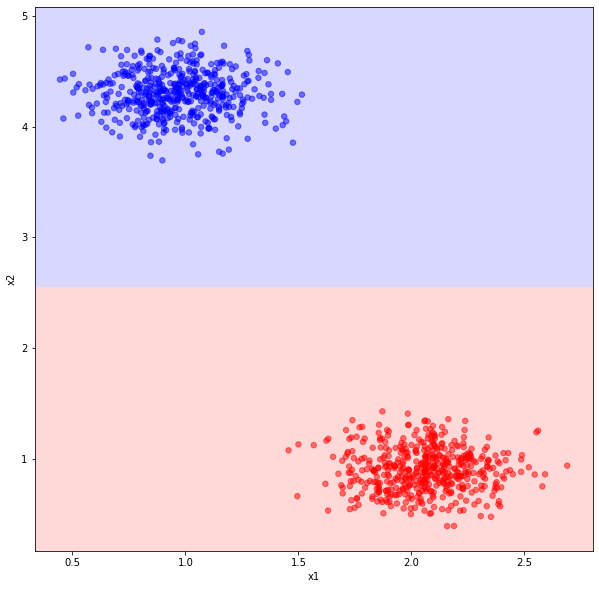

In [27]:
visualize_classifier(tree, X, y)

In [28]:
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

1.0

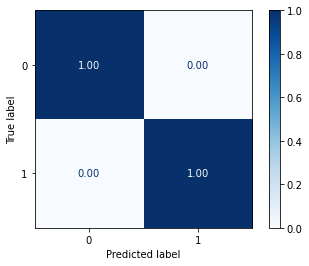

In [29]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.2f', normalize= 'true')

In [30]:
# Probabos cambiando cluster_std (menor desviación), lo que a priori deberia ser mas simple, porque aleja los grupos
X, y = make_blobs(
    n_samples=1000, 
    centers=2,
    random_state=0, 
    cluster_std=4)

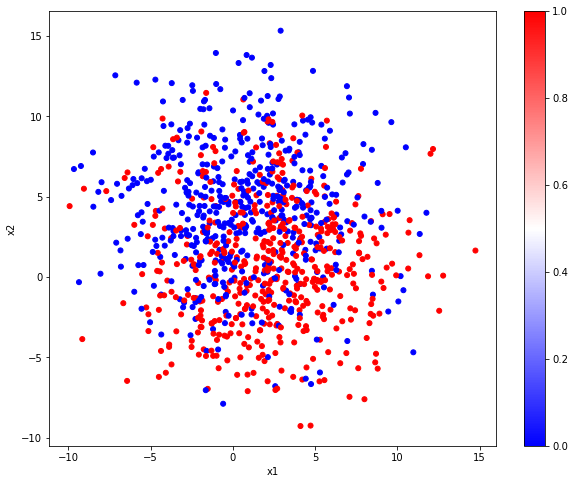

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [32]:
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)
# lo entrenamos
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

C:\Anaconda3\envs\acamica\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'clim'


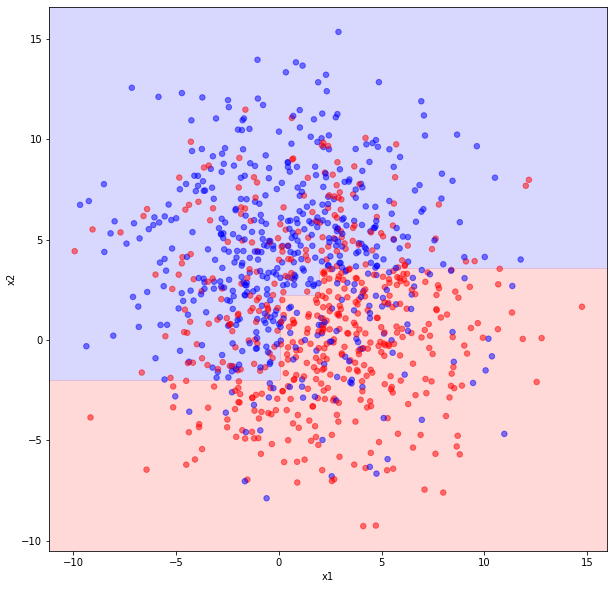

In [33]:
visualize_classifier(tree, X, y)

In [34]:
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

0.714

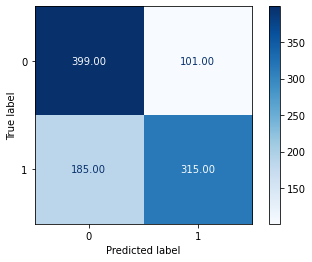

In [35]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.2f')

**2. ¿Qué ocurre si modificas el valor de `centers` en la función `make_blobs`?¿En qué cambia la formulación del problema de clasificación?**

In [38]:
# Ahora probamos 4 grupos.. con ds bajo.. debería seguir siendo siemple
X, y = make_blobs(
    n_samples=1000, 
    centers=4,
    random_state=0, 
    cluster_std=0.8)

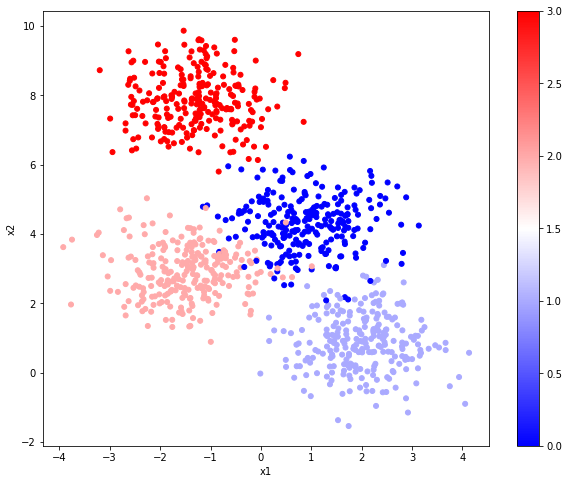

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [40]:
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)
# lo entrenamos
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

C:\Anaconda3\envs\acamica\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'clim'


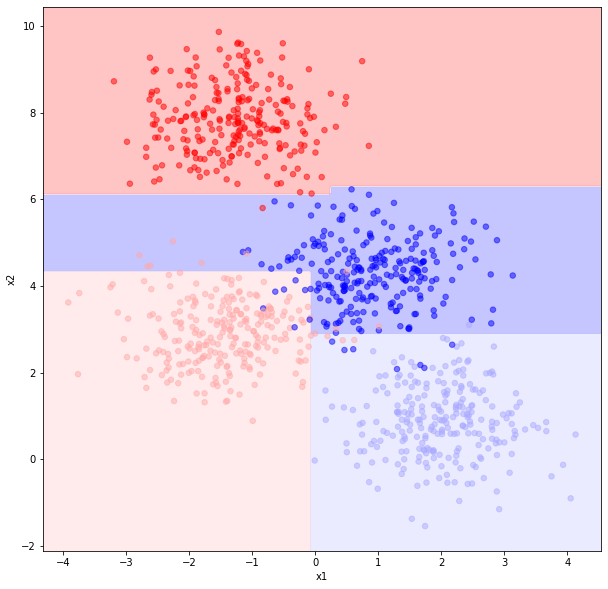

In [41]:
visualize_classifier(tree, X, y)

In [42]:
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

0.97

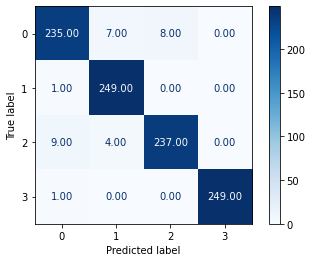

In [43]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.2f')

**3. Hay algunas características de esta formulación que tal vez te llamen la atención. En el caso binario, un problema de clasificación consiste en encontrar una _frontera_ entre puntos que deje a un lado los que pertenecen a una clase, y del otro lado los puntos de la otra clase. Para convencerse (¡o no!):**